# K-MEANS ALGORITHM

This exercise consists of three parts. Finish the first part to get a mark of 3.0; the first two parts for 4.0. Complete all three parts to get 5.0. <br>
Advanced* and optional - means it is optional and will not affect the grade.

## Part 1

In [1]:
### SOME IMPORTS
import common as cm
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import statistics
import copy

1.1) Complete the following distance function

In [8]:
# Computes a Euclidean distance between points A and B (these are vectors, i.e., A[0], A[1], ....)
def getEuclideanDistance(A, B):
    return sum([(A[i] - B[i])**2 for i in range(len(A))])**0.5
    
### TEST
print(getEuclideanDistance([0.0, 0.0], [0.0, 1.0]))
print(getEuclideanDistance([0.0, 0.0], [1.0, 1.0]))

1.0
1.4142135623730951


1.2) Get test data set & display (data = matrix n x m, n = the number of objects, m = the number of attributes)

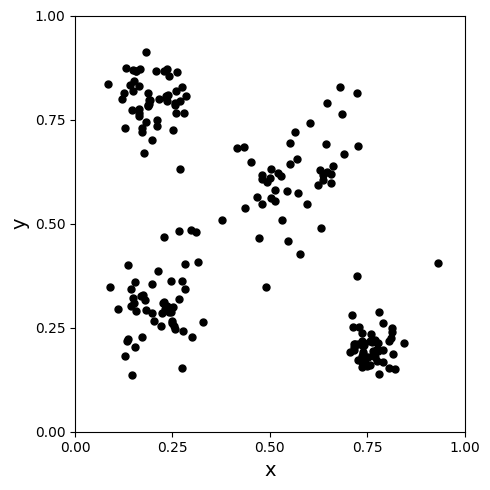

In [9]:
data = cm.getTestDataSet()
cm.displayDataSet(plt, data) #plt = plot package; see the imports above

**How many different clusters (groups) do you see here?**

**Answer:** 4

The data for this exercise was generated artificially. You can run the below code to see the "true" group assignment.

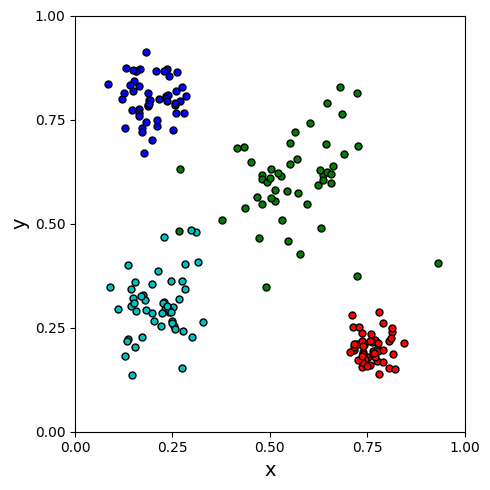

In [4]:
data = cm.getTestDataSet()
assignments = cm.getTestAssignments() ### GET "TRUE" GROUP ASSIGNMENT
cm.displayDataSet(plt, data, assignments = assignments)

1.3) K-Means implementation: Firstly, we need to construct K "centroids". Each centroid represents one group. For simplicity, initially assume that the centroids are randomly selected from the data set (i.e., clone/copy some K random points from data set). Check numpy.random package. Important: each centroid should be unique (no repetitions, consider a "shuffle" approach). Finish the bolow code.

In [110]:
### return a vector of centroids (vectors) [[x1, y1], ..., [xk, yk]]
def getCentroids(K, data):
    idx=np.random.randint(len(data), size=K)
    x = [data[idx[i]] for i in range(K)]
    return x

print(getCentroids(2, data))

[[0.7641165097747938, 0.19467271082770582], [0.4734354084375231, 0.46572395261319194]]


1.4) Get acquainted with some parameters: 
- DATA - test data set, a vector of  n 2d points: [[x1, y1], ..., [xn, yn]], loaded from common.py
- M - the number of attributes/dimensions; M = 2 for this exercise,
- K - expected number of groups,
- CENTROIDS - initial K centroids; CENTROIDS =  [[x1, y1],...,[xk, yk]],
- ASSIGNMENTS - data structure representing group assignments; ASSIGNMENTS = [[idx1_1,...,],....,[idx1_K,....]], i.e., i-th element is a vector of indexes of corresponding data points in DATA, being assigned to i-th group. For instance if |DATA| = 3, K = 2, and ASSIGNMENTS = [[0, 2], [1]], it means that DATA[0] and DATA[2] points are assigned to the first group, while DATA[1] point is assigned to the second group.

1.5) Finish the below function. It should perform a single step of K-Means algorithm:

a) Firstly, construct new group assignments. For this reason, iterate over all data points. For each (i-th) point, verify its distance to each (k-th) centroid. Check for which centroid the distance is the smallest and update NEW_ASSIGNMENTS adequately (NEW_ASSIGNMENTS[k-th centroid].append(i-th index/data point)).

Important: NO_CHANGE boolean variable should be set to False if the assignments have changed from the previous iteration to the current one (NEW_ASSIGNMENTS != (OLD) ASSIGNMENTS). 

b) Update centroids (NEW_CENTROIDS), i.e., compute centers of masses of data points belonging to different groups. 

c) Return NO_CHANGE, NEW_ASSIGNMENTS, NEW_CENTROIDS.

In [111]:
def doKMeansStep(DATA, M, K, CENTROIDS, ASSIGNMENTS):    
    NO_CHANGE = True
    if ASSIGNMENTS is None: 
        NO_CHANGE = False
    
    distances=[]
    for i in range (len(DATA)):
        distance=[getEuclideanDistance(DATA[i], CENTROIDS[j]) for j in range(K)]
        distances.append(distance)
        
    ### CONSTRUCT NEW ASSIGNMENTS
    NEW_ASSIGNMENTS = [[] for k in range(K)]
    for i in range (len(DATA)):
        mini=0
        for j in range (K):
            if (distances[i][j]<distances[i][mini]):
                mini=j
        NEW_ASSIGNMENTS[mini].append(i)
    
    if(NEW_ASSIGNMENTS != ASSIGNMENTS):
        NO_CHANGE=False

    ### CONSTRUCT NEW CENTROIDS
    NEW_CENTROIDS = []
    NEW_CENTROIDS = [[sum(DATA[i][j] for i in k)/(len(k) if len(k)!=0 else 1) for j in range (M)] for k in NEW_ASSIGNMENTS]
                
    return NO_CHANGE, NEW_CENTROIDS, NEW_ASSIGNMENTS 

1.6) The below code performs 1 iteration of K-Menas algorithm for K=2 and the test data set. Check the results (notice that centroids are marked with squares).

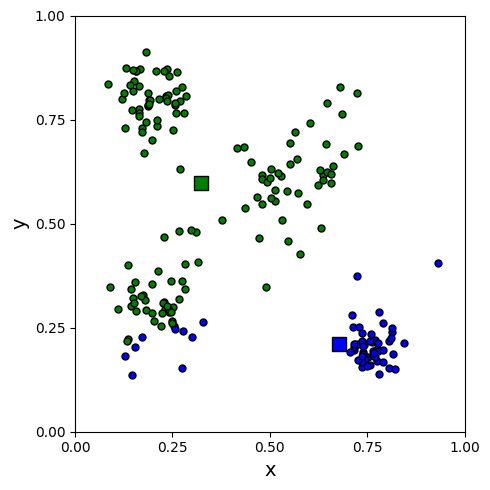

In [114]:
DATA = cm.getTestDataSet()
CENTROIDS = getCentroids(2, DATA)
NO_CHANGE, CENTROIDS, ASSIGNMENTS = doKMeansStep(DATA, 2, 2, CENTROIDS.copy(), None)
cm.displayDataSet(plt, DATA, assignments = ASSIGNMENTS, centroids = CENTROIDS)

1.7) Complete the below piece of code. The doKMeans function should perform 100 steps of K-Means algorithm. However, the loop should be stopped when the NO_CHANGE variable = True. It that is so, **print the information on after how many iterations the process has stopped**. Lastly, use cm.displayDataSet to depict the final groups. 

(Advanced*): make an animation showing the steps of the K-means algorithm. It is easier to do in jupyter notebook.
https://matplotlib.org/3.3.2/api/animation_api.html
http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/

Process terminated after 6 iterations


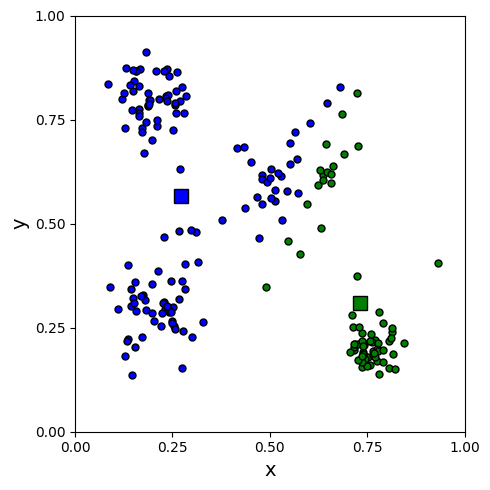

In [119]:
def doKMeans(DATA, CENTROIDS, K = 2, M = 2, display = True):
    ASSIGNMENTS = None 
    for i in range(100):
        NO_CHANGE, CENTROIDS, ASSIGNMENTS = doKMeansStep(DATA, M, K, CENTROIDS, ASSIGNMENTS)
        if (NO_CHANGE==True):
            if (display==True):
                print (f"Process terminated after {i+1} iterations")
                cm.displayDataSet(plt, DATA, assignments = ASSIGNMENTS, centroids = CENTROIDS)
            break
    return DATA, CENTROIDS, ASSIGNMENTS   

DATA = cm.getTestDataSet()
CENTROIDS = getCentroids(2, DATA)
DATA, CENTROIDS, ASSIGNMENTS = doKMeans(DATA, CENTROIDS, K = 2)

1.8) Run the below piece of code and observe the results. Which K seems to be the best choice?

Kmeans algorithm for 2 centroids:
Process terminated after 9 iterations


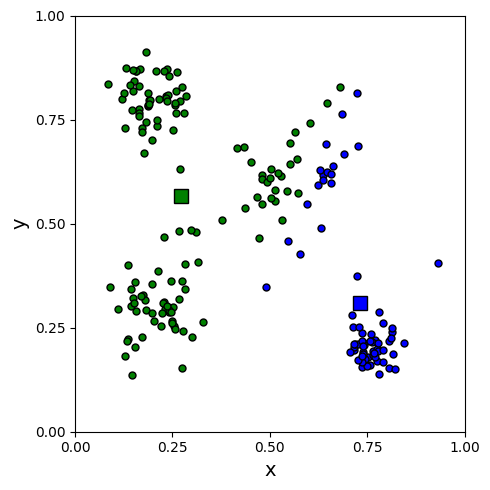



Kmeans algorithm for 3 centroids:
Process terminated after 6 iterations


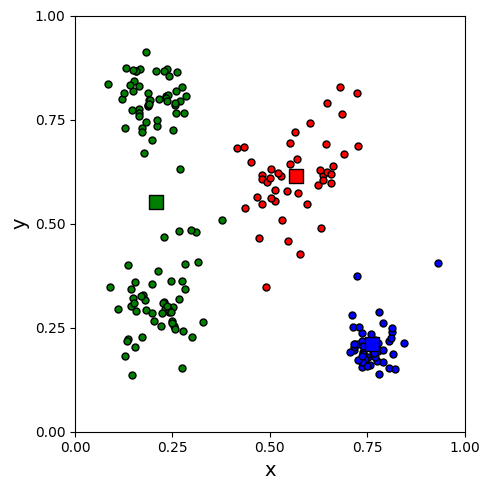



Kmeans algorithm for 4 centroids:
Process terminated after 4 iterations


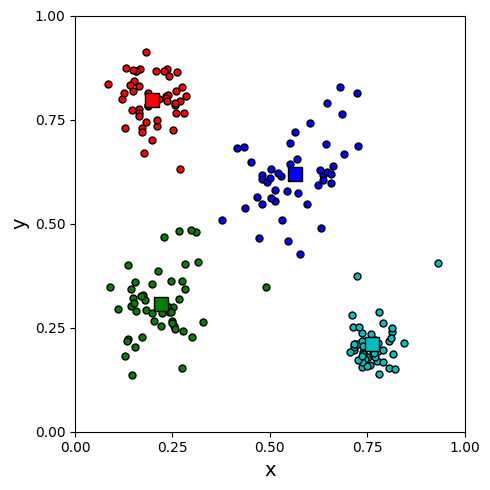



Kmeans algorithm for 5 centroids:
Process terminated after 2 iterations


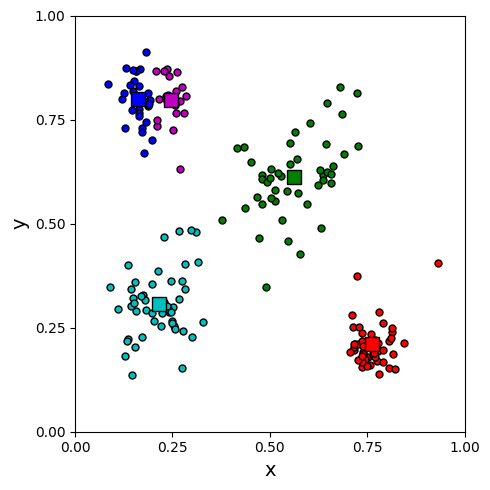



Kmeans algorithm for 6 centroids:
Process terminated after 10 iterations


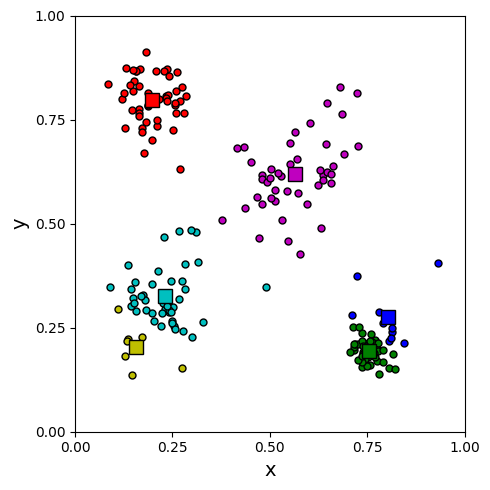



Kmeans algorithm for 7 centroids:
Process terminated after 10 iterations


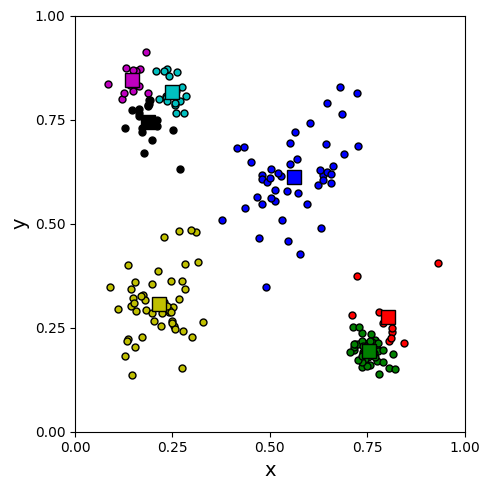



Kmeans algorithm for 8 centroids:
Process terminated after 6 iterations


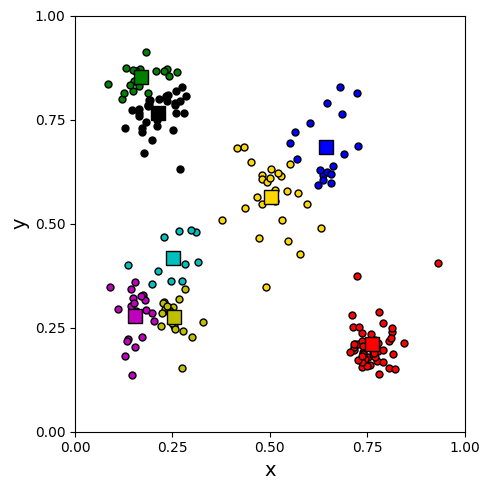



Kmeans algorithm for 9 centroids:
Process terminated after 11 iterations


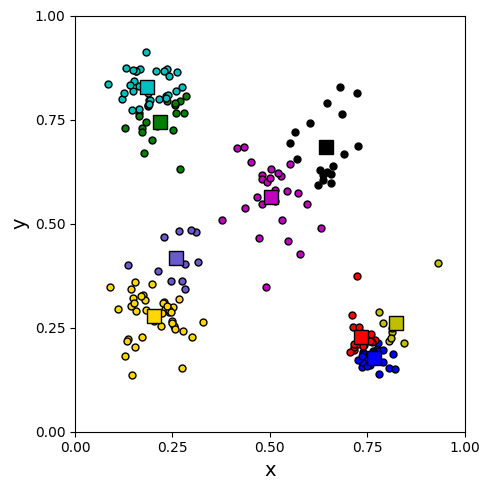



Kmeans algorithm for 10 centroids:
Process terminated after 5 iterations


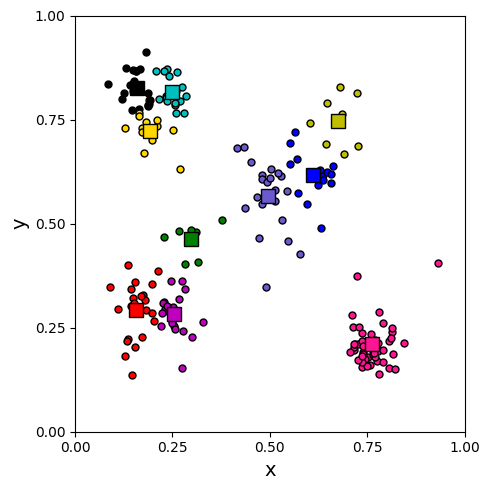

In [120]:
DATA = cm.getTestDataSet()
for k in range(2, 11):
    print(f"Kmeans algorithm for {k} centroids:")
    CENTROIDS = getCentroids(k, DATA)
    DATA, NEW_CENTROIDS, NEW_ASSIGNMENTS = doKMeans(DATA, CENTROIDS, K = k)
    print('\n')

## Part 2

The quality of final group assignment can be assessed in various ways. In this exercise, you are asked to compute a total (sum) distance between data points and their cluster centroids for different values of K. Obviously, it is expected that such indicator will always decrese with the increase of K. But, obviously, $K=\infty$ is not the best option. However, there exsits some threshold K' such that for each K'' > K' the decrease will not be significant. This threshold is called an "elbow" and its corresponding K value is considered satisfactory. Firstly, complete the below function. It should compute the total (sum) distance between data points and their cluster centroids. Secondly, compute the the total distances for final clusters for for $K\in [2, 10]$. Then, plot the results. Use cm.displayResults(plt, results), where results takes the follwoing form: [[2, result for K = 2], [3, result for K = 3], ..., [10, result for K = 10]]. **Find the "elbow"**.

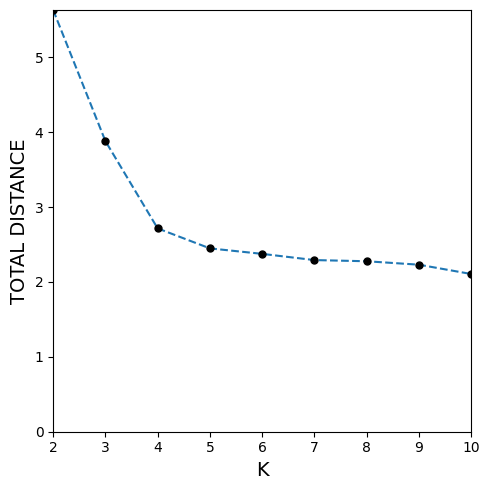

In [122]:
def getTotalDistance(DATA, CENTROIDS, ASSIGNMENTS):
    TD=0
    for i in range (len(CENTROIDS)):
        for j in range (len(ASSIGNMENTS[i])):
            TD+=getEuclideanDistance(DATA[ASSIGNMENTS[i][j]], CENTROIDS[i])
    return TD

results=[]
DATA=cm.getTestDataSet()
TotalDist=[[] for x in range (0, 11)]
for k in range (2,11):
    for i in range (10):
        CENTROIDS=getCentroids(k, data)
        DATA, CENTROIDS, ASSIGNMENTS = doKMeans(DATA, CENTROIDS, k, 2, display=False)
        TotalDist[k].append(getTotalDistance(DATA, CENTROIDS, ASSIGNMENTS))
    results.append ([k, sum(TotalDist[k], 100)/100])
cm.displayResults(plt, results)

In [ ]:
#Best Clustering is obtained for K=4 (then we have "elbow" - spot, where plot representing Total Distance for different K from interval [2, 10] decreases gently instead of sharply)

# Part 3 - a small case study

In this exercise you are asked to use the K-Means algorithm to cluster some data provided in cm.getCaseDataSet() (important note, this data was generated artificially - this is not real-world data). This data contains information on 250 persons. Each person is characterized with the following attributes:

a) Age <br>
b) Salary (zł) <br> 
c) Health index (0-100; 0 = worst health, 100 = best health) <br>
d) Time spent in school or work (hours) <br>
e) Time spent on sport activities (hours) <br>

Follow these steps:
1. Load the data. 
2. Check the min and max values for each attribute and consider normalization. 
3. Run K-Means algorithm (use the pieces of code you completed in previous exercises) for different K. 
4. Identify the best K using the performance indicator introduced in Part 2. 
5. For the best K - analyze constructed clusters. 
    * Compute basic stats (mean, max, min and standard deviation) attribute values within each cluster. You should use centroids constructed in the final iteration. 
    * (optional) Generate distribution plots. 
    * (optional) Calculate the internal consistency of clusters by calculating basic stats (mean, max, min and standard deviation) of distance between each pair of objects in each cluster and visualize this data.
    * (optional) Compute basic stats (mean, max, min and standard deviation) of distance between each pair of clusters and visualize this data.
    * You can print these values / show pandas DataFrame / visualize them with matplotlib boxplot (optional). 
    * Values should be presented in a non-normalized version.
6. Using the above, briefly describe each cluster.

In [128]:
DATA = cm.getCaseDataSet()
DATA_N=copy.deepcopy(DATA)

In [129]:
### CONSIDER NORMALIZATION HERE
mini = [np.inf for i in range(5)]
maxi = [0 for i in range(5)]

#minimal and maximal values
for i in range (len(DATA_N)):
    for j in range (len(DATA_N[i])):
        if(DATA_N[i][j]<mini[j]):
            mini[j]=DATA_N[i][j]
        if(DATA_N[i][j]>maxi[j]):
            maxi[j]=DATA_N[i][j]
#min-max normalization
for i in range (len(DATA_N)):
    for j in range(len(DATA_N[i])):
        DATA_N[i][j]=(DATA_N[i][j] - mini[j])/(maxi[j]-mini[j])

In [132]:
def doKMeans_CaseStudy(DATA, K = 2, M = 5):
    CENTROIDS = getCentroids(K, DATA) # GET CENTROIDS
    ASSIGNMENTS = None
    for _ in range (100):
        NO_CHANGE, CENTROIDS, ASSIGNMENTS = doKMeansStep(DATA, M, K, CENTROIDS, ASSIGNMENTS)
        if (NO_CHANGE == True):
            break
    return DATA, CENTROIDS, ASSIGNMENTS 

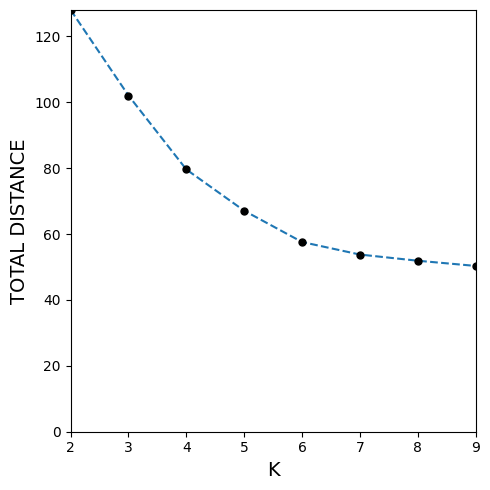

In [133]:
results = []
for k in range (2, 10):
    result = 0
    for _ in range (100):
        DATA_, NEW_CENTROIDS, NEW_ASSIGNMENTS = doKMeans_CaseStudy(DATA_N, k)
        result=result+getTotalDistance(DATA_, NEW_CENTROIDS, NEW_ASSIGNMENTS)
    results.append ([k, (result/100)])
    
cm.displayResults(plt, results)

**Best K** is 6

In [134]:
DATA_, Centroids, Assignments = doKMeans_CaseStudy(DATA_N, 6, 5)

In [136]:
for i in range(len(Assignments)):
    print(f"Number of points in class {i} is {len(Assignments[i])}")

Number of points in class 0 is 38
Number of points in class 1 is 50
Number of points in class 2 is 17
Number of points in class 3 is 52
Number of points in class 4 is 43
Number of points in class 5 is 50


In [161]:
stats = [[[] for j in range(5)] for i in range(6)] # min, max, mean, sd
for j in range(len(Assignments)):
    idxs = Assignments[j]
    data_points = np.array(DATA)[idxs]
    print(len(data_points))
    for i in range(5):
        curr_stats = []
        curr_stats.append(np.min(data_points[:, i]))
        curr_stats.append(np.max(data_points[:, i]))
        curr_stats.append(np.mean(data_points[:, i]))
        curr_stats.append(np.std(data_points[:, i]))
        stats[j][i] = curr_stats

38
50
17
52
43
50


In [164]:
atrs = ["Age", "Salary", "Health index", "Time in school", "Time on sport"]
for gr in range(6):
    print(f"For cluster {gr+1}")
    for atr in range(5):
        print(f"    Attribute {atrs[atr]}:")
        print(f"        min: {stats[gr][atr][0]}")
        print(f"        max: {stats[gr][atr][1]}")
        print(f"        mean: {stats[gr][atr][2]}")
        print(f"        standard deviation: {stats[gr][atr][3]}")

For cluster 1
    Attribute Age:
        min: 31.275703003776062
        max: 68.66380009272345
        mean: 52.09135552532683
        standard deviation: 9.270195283999241
    Attribute Salary:
        min: 1403.3704209479874
        max: 5809.671857387103
        mean: 3792.7188431567715
        standard deviation: 1114.5748533649148
    Attribute Health index:
        min: 16.510679111040552
        max: 67.52567771446553
        mean: 47.5087575758804
        standard deviation: 12.133365915075938
    Attribute Time in school:
        min: 42.5419083363186
        max: 59.98286275905256
        mean: 52.62119754738336
        standard deviation: 5.11113712617241
    Attribute Time on sport:
        min: 0.07828167791577645
        max: 8.68175544749231
        mean: 2.861209780505538
        standard deviation: 2.285951431764584
For cluster 2
    Attribute Age:
        min: 15.012362258670485
        max: 29.41303379969164
        mean: 21.156256641545124
        standard deviatio